In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:

file_path = "/content/drive/MyDrive/distribuicao-renda.csv"



!pip install pyspark


from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("DistribuicaoRenda").getOrCreate()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=9b0a20bd43a0c0ddfb553005251e156c53ecd2c3aa878505fee8d72bd355491a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [5]:

df = spark.read.option("header", "true").csv(file_path)

df.show()

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:

from pyspark.sql.functions import count, when, isnull




In [10]:

numeric_cols = [col_name for col_name, col_type in df.dtypes if 'int' in col_type or 'double' in col_type]
df_numeric = df.select(numeric_cols)


df_numeric.summary().show()


+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    25%|
|    50%|
|    75%|
|    max|
+-------+



In [13]:

columns_with_underscores = [col.replace(';', '_') for col in df.columns]


null_counts = [f"sum(ifnull(`{col.replace(';', '_')}`, 0)) as `{col.replace(';', '_')}_null_count`" for col in df.columns]



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col


df_pandas = df.toPandas()




In [24]:

null_counts = [f"sum(ifnull(`{col.replace(';', '_')}`, 0)) as `{col.replace(';', '_')}_null_count`" for col in df.columns]





In [29]:
import pandas as pd


df_pandas = df.toPandas()


if "Rendimentos Tributaveis" in df_pandas.columns:

    df_pandas["Rendimentos Tributaveis"] = pd.to_numeric(df_pandas["Rendimentos Tributaveis"], errors="coerce")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Rendimentos Tributaveis", y="Imposto Devido", data=df_pandas)
    plt.title("Relação entre Rendimentos Tributáveis e Imposto Devido")
    plt.show()
else:
    print("A coluna 'Rendimentos Tributáveis' não existe no DataFrame.")


A coluna 'Rendimentos Tributáveis' não existe no DataFrame.


In [32]:

df.printSchema()


root
 |-- Ano-calendário;Ente Federativo;Centil;Quantidade de Contribuintes;Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões];Rendimentos Tributaveis - Soma da RTB do Centil [R$ milhões];Rendimentos Tributaveis - RTB Acumulada do Centil [R$ milhões];Rendimentos Tributaveis - Média da RTB do Centil [R$];Rendimentos Sujeitos à Tribut. Exclusiva [R$ milhões];Rendimentos Isentos - Lucros e dividendos [R$ milhões];Rendimentos Isentos - Rendim. Sócio/Titular ME/EPP Opt SIMPLES [R$ milhões];Rendimentos Isentos - Outros Rendimentos Isentos [R$ milhões];Despesas Dedutíveis - Previdência [R$ milhões];Despesas Dedutíveis - Dependentes [R$ milhões];Despesas Dedutíveis - Instrução [R$ milhões];Despesas Dedutíveis - Médicas [R$ milhões];Despesas Dedutíveis - Pensão Alimentícia [R$ milhões];Despesas Dedutíveis - Livro-Caixa [R$ milhões];Imposto Devido [R$ milhões];Bens e Direitos - Imóveis [R$ milhões];Bens e Direitos - Móveis [R$ milhões];Bens e Direitos - Financeiros [R$ milhõ

In [33]:

df = spark.read.option("header", "true").option("delimiter", ";").csv(file_path)


df.show()


+--------------+---------------+------+---------------------------+-----------------------------------------------------------------------+------------------------------------------------------------+--------------------------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+------------------------------------------------------+---------------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------+----------------------------------------------+--------------------------------------------+------------------------------------------+-----------------------------------------------------+----------------------------------------------+---------------------------+--------------------------------------+-------------------------------------+------------------------------------------+-----

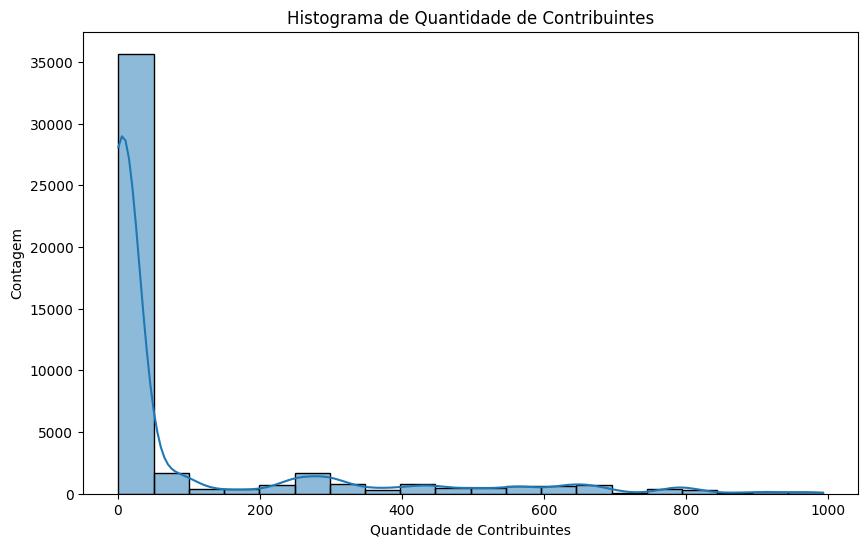

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


column_to_plot = 'Quantidade de Contribuintes'

data_for_histogram = df.select(column_to_plot).toPandas()


plt.figure(figsize=(10, 6))
sns.histplot(data_for_histogram[column_to_plot], bins=20, kde=True)
plt.title(f'Histograma de {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Contagem')
plt.show()


In [38]:
null_counts = [f"sum(ifnull(`{col.replace(';', '_')}`, 0)) as `{col.replace(';', '_')}_null_count`" for col in df.columns]
df.selectExpr(null_counts).show()


+-------------------------+--------------------------+-----------------+--------------------------------------+----------------------------------------------------------------------------------+-----------------------------------------------------------------------+-------------------------------------------------------------------------+----------------------------------------------------------------+----------------------------------------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------+---------------------------------------------------------+-------------------------------------------------------+-----------------------------------------------------+----------------------------------------------------------------+-------------

In [40]:
df.select('Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]', 'Imposto Devido [R$ milhões]').describe().show()


+-------+-----------------------------------------------------------------------+---------------------------+
|summary|Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]|Imposto Devido [R$ milhões]|
+-------+-----------------------------------------------------------------------+---------------------------+
|  count|                                                                    113|                      38184|
|   mean|                                                     179.47787610619469|         2.3106909820980426|
| stddev|                                                      297.8209582398078|         27.859990261493714|
|    min|                                                                    0.0|                          0|
|    max|                                                                  980.0|                     999,71|
+-------+-----------------------------------------------------------------------+---------------------------+



In [41]:
from pyspark.sql.functions import corr

df.select(corr('Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]', 'Imposto Devido [R$ milhões]')).show()


+----------------------------------------------------------------------------------------------------------+
|corr(Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões], Imposto Devido [R$ milhões])|
+----------------------------------------------------------------------------------------------------------+
|                                                                                                      NULL|
+----------------------------------------------------------------------------------------------------------+



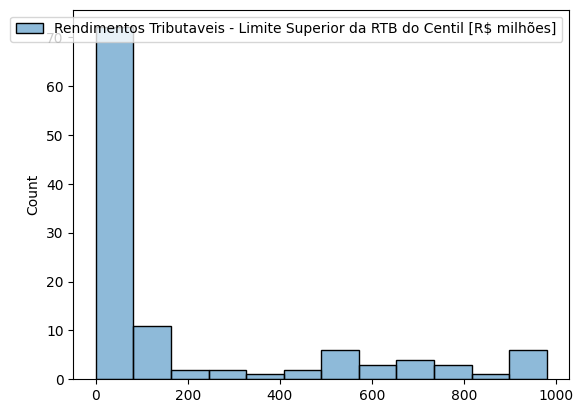

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df.select('Rendimentos Tributaveis - Limite Superior da RTB do Centil [R$ milhões]').toPandas())
plt.show()
